In [ ]:
# 1. 📦 Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from glob import glob
import os

# 🎨 Estilo de gráficos
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [10]:
# 3. 📂 Cargar el conjunto de datos en crudo y filtrado
def get_raw_emg():
    data_root = f"F:/orthesis_classification/data/raw/mv_signals/"
    filepaths = glob(os.path.join(data_root, "emg_v0*.csv"))
    dataframes = []
    for filepath in filepaths:
        raw_emg = pd.read_csv(filepath)
        dataframes.append(raw_emg)
    
    return dataframes

def get_filtered_emg():
    data_root = f"F:/orthesis_classification/data/processed/filtered/"
    filepaths = glob(os.path.join(data_root, "emg_v0*.csv"))
    dataframes = []
    for filepath in filepaths:
        filtered_emg = pd.read_csv(filepath)
        dataframes.append(filtered_emg)
    
    return dataframes

raw_emg = get_raw_emg()
filtered_emg = get_filtered_emg()

In [11]:
# 4. 🔢 Funciones de análisis de datos
def data_structure(signal):
    for i, data in enumerate(signal):
        print(f"\n📋 Estructura del dataset #{i+1}: ")
        data.info()
        print("\n🔢 Tipos de datos del dataset:\n", data.dtypes)
    
def data_stats(signal):
     for i, data in enumerate(signal):
         print(f"\n📊 Estadísticas descriptivas del dataset #{i+1}: ")
         print(data.describe())
    
def missing_values(signal):
    for i, data in enumerate(signal):
        print(f"\n❓ Valores nulos por columna en dataset #{i+1}: ")
        print(data.isnull().sum())
        print(f"\n❓ Valores NaN por columna en dataset #{i+1}: ")
        print(data.isna().sum())
    
# data_structure(raw_emg)
data_structure(filtered_emg)
data_stats(filtered_emg)
missing_values(filtered_emg)


📋 Estructura del dataset #1: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HandOpen         5980 non-null   float64
 1   HandClose        5980 non-null   float64
 2   Wrist Flexion    5980 non-null   float64
 3   Wrist Extension  5980 non-null   float64
 4   Supination       5980 non-null   float64
 5   Pronation        5980 non-null   float64
 6   Rest             5980 non-null   float64
dtypes: float64(7)
memory usage: 327.2 KB

🔢 Tipos de datos del dataset:
 HandOpen           float64
HandClose          float64
Wrist Flexion      float64
Wrist Extension    float64
Supination         float64
Pronation          float64
Rest               float64
dtype: object

📋 Estructura del dataset #2: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 7 columns):
 #   Column           Non-Null Coun

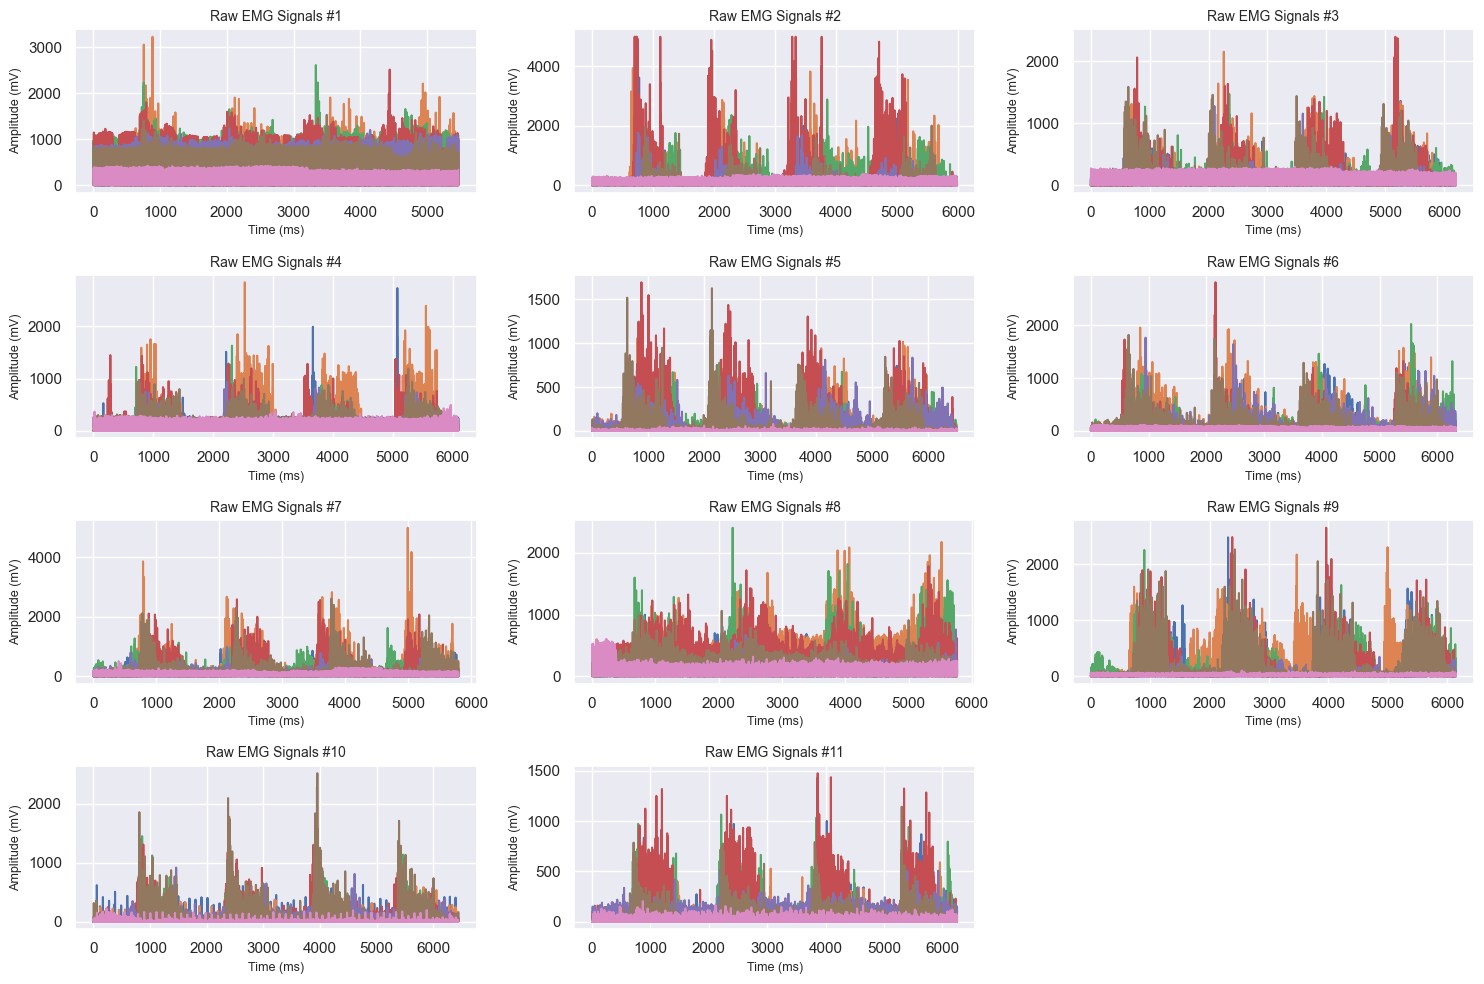

In [12]:
# 5. 📊 Visualizar el conjunto de datos en crudo y filtrados
columns = ["HandOpen", "HandClose", "Wrist Flexion", "Wrist Extension", "Supination", "Pronation", "Rest"]

for i, data in enumerate(raw_emg):
    plt.subplot(4,3,i+1)
    for col in columns:
        plt.plot(data[col], label=col)
        plt.title(f"Raw EMG Signals #{i+1}", fontsize=10)
        plt.xlabel("Time (ms)", fontsize=9)
        plt.ylabel("Amplitude (mV)", fontsize=9)
    
plt.tight_layout()
plt.show()

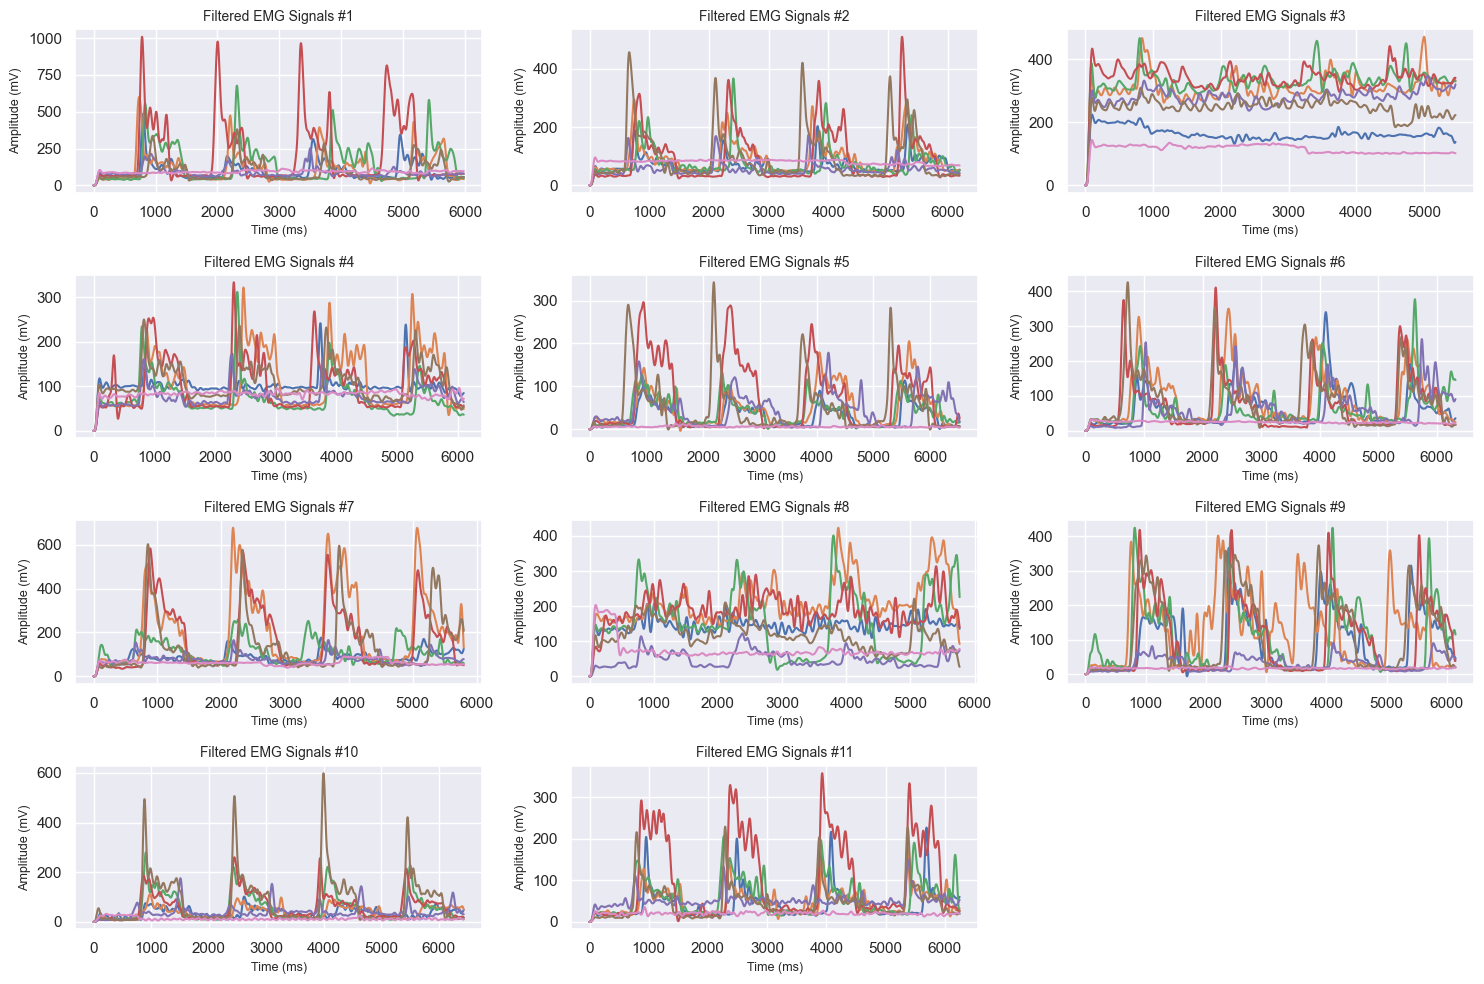

In [13]:
for i, data in enumerate(filtered_emg):
    plt.subplot(4,3,i+1) 
    for col in columns:
        plt.plot(data[col], label=col)
        plt.title(f"Filtered EMG Signals #{i+1}", fontsize=10)
        plt.xlabel("Time (ms)", fontsize=9)
        plt.ylabel("Amplitude (mV)", fontsize=9)

plt.tight_layout()
plt.show()

In [14]:
# 6. 📈 Visualizar la correlación entre las señales
for i, data in enumerate(filtered_emg):
     print(f"\n🔁 Correlación - Archivo #{i+1}")
     display(data.corr(method="pearson").style.background_gradient(cmap='coolwarm'))


🔁 Correlación - Archivo #1


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.374125,0.202324,0.405338,0.498296,0.264483,-0.051966
HandClose,0.374125,1.000000,0.272278,0.108953,0.187251,0.504632,-0.076845
Wrist Flexion,0.202324,0.272278,1.000000,-0.067686,0.181532,0.509333,0.083194
Wrist Extension,0.405338,0.108953,-0.067686,1.000000,0.383955,0.044760,-0.027366
Supination,0.498296,0.187251,0.181532,0.383955,1.000000,0.198259,0.043488
Pronation,0.264483,0.504632,0.509333,0.044760,0.198259,1.000000,0.010396
Rest,-0.051966,-0.076845,0.083194,-0.027366,0.043488,0.010396,1.000000



🔁 Correlación - Archivo #2


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.706195,0.282971,0.536668,0.175802,0.313314,0.097233
HandClose,0.706195,1.000000,0.265730,0.732841,0.306526,0.389686,0.146823
Wrist Flexion,0.282971,0.265730,1.000000,0.430965,0.005442,0.118279,0.133199
Wrist Extension,0.536668,0.732841,0.430965,1.000000,0.121450,0.219051,0.109417
Supination,0.175802,0.306526,0.005442,0.121450,1.000000,0.622521,0.156992
Pronation,0.313314,0.389686,0.118279,0.219051,0.622521,1.000000,0.117501
Rest,0.097233,0.146823,0.133199,0.109417,0.156992,0.117501,1.000000



🔁 Correlación - Archivo #3


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.425029,0.404440,0.658544,0.461795,0.486539,0.533700
HandClose,0.425029,1.000000,0.618858,0.521822,0.675719,0.582078,0.285881
Wrist Flexion,0.404440,0.618858,1.000000,0.637609,0.627517,0.544971,0.294998
Wrist Extension,0.658544,0.521822,0.637609,1.000000,0.598047,0.564414,0.542642
Supination,0.461795,0.675719,0.627517,0.598047,1.000000,0.497350,0.286020
Pronation,0.486539,0.582078,0.544971,0.564414,0.497350,1.000000,0.683543
Rest,0.533700,0.285881,0.294998,0.542642,0.286020,0.683543,1.000000



🔁 Correlación - Archivo #4


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.052049,0.095681,0.317938,0.388706,0.179526,0.368271
HandClose,0.052049,1.000000,0.405232,0.489648,0.449460,0.631557,0.053221
Wrist Flexion,0.095681,0.405232,1.000000,0.424313,0.429485,0.693120,0.079881
Wrist Extension,0.317938,0.489648,0.424313,1.000000,0.457496,0.505509,0.063251
Supination,0.388706,0.449460,0.429485,0.457496,1.000000,0.631740,0.236202
Pronation,0.179526,0.631557,0.693120,0.505509,0.631740,1.000000,0.048268
Rest,0.368271,0.053221,0.079881,0.063251,0.236202,0.048268,1.000000



🔁 Correlación - Archivo #5


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.836821,0.690185,0.773232,0.460502,0.078260,-0.218422
HandClose,0.836821,1.000000,0.617798,0.633270,0.421508,0.092930,-0.240375
Wrist Flexion,0.690185,0.617798,1.000000,0.797599,0.276008,0.275255,-0.130106
Wrist Extension,0.773232,0.633270,0.797599,1.000000,0.351571,0.194094,-0.179574
Supination,0.460502,0.421508,0.276008,0.351571,1.000000,-0.189699,-0.149757
Pronation,0.078260,0.092930,0.275255,0.194094,-0.189699,1.000000,-0.149089
Rest,-0.218422,-0.240375,-0.130106,-0.179574,-0.149757,-0.149089,1.000000



🔁 Correlación - Archivo #6


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.568506,0.487615,0.154446,0.529425,0.114225,-0.048348
HandClose,0.568506,1.000000,0.550590,0.495157,0.259964,0.395330,0.133490
Wrist Flexion,0.487615,0.550590,1.000000,0.177291,0.133339,0.126591,-0.092871
Wrist Extension,0.154446,0.495157,0.177291,1.000000,-0.024959,0.745592,0.099820
Supination,0.529425,0.259964,0.133339,-0.024959,1.000000,-0.072549,-0.152736
Pronation,0.114225,0.395330,0.126591,0.745592,-0.072549,1.000000,0.104103
Rest,-0.048348,0.133490,-0.092871,0.099820,-0.152736,0.104103,1.000000



🔁 Correlación - Archivo #7


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.438043,0.216632,0.252000,0.358329,0.185818,0.085003
HandClose,0.438043,1.000000,0.395554,0.767524,0.484453,0.487589,0.062085
Wrist Flexion,0.216632,0.395554,1.000000,0.329371,0.339099,0.164053,-0.017890
Wrist Extension,0.252000,0.767524,0.329371,1.000000,0.368167,0.549780,-0.026506
Supination,0.358329,0.484453,0.339099,0.368167,1.000000,0.355971,0.208839
Pronation,0.185818,0.487589,0.164053,0.549780,0.355971,1.000000,0.117370
Rest,0.085003,0.062085,-0.017890,-0.026506,0.208839,0.117370,1.000000



🔁 Correlación - Archivo #8


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.332608,0.267270,0.334601,0.239583,0.416006,-0.051030
HandClose,0.332608,1.000000,0.380551,0.523730,0.291829,0.033899,-0.149780
Wrist Flexion,0.267270,0.380551,1.000000,0.288758,0.454921,0.308645,0.012532
Wrist Extension,0.334601,0.523730,0.288758,1.000000,0.523376,0.345051,-0.320313
Supination,0.239583,0.291829,0.454921,0.523376,1.000000,0.269243,-0.207117
Pronation,0.416006,0.033899,0.308645,0.345051,0.269243,1.000000,-0.061021
Rest,-0.051030,-0.149780,0.012532,-0.320313,-0.207117,-0.061021,1.000000



🔁 Correlación - Archivo #9


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.068756,0.459693,0.673402,0.423977,0.781991,0.073419
HandClose,0.068756,1.000000,0.066157,0.057603,-0.077628,0.318117,0.002804
Wrist Flexion,0.459693,0.066157,1.000000,0.686508,0.642759,0.515239,-0.016272
Wrist Extension,0.673402,0.057603,0.686508,1.000000,0.612681,0.672046,-0.092876
Supination,0.423977,-0.077628,0.642759,0.612681,1.000000,0.409438,-0.072667
Pronation,0.781991,0.318117,0.515239,0.672046,0.409438,1.000000,0.039179
Rest,0.073419,0.002804,-0.016272,-0.092876,-0.072667,0.039179,1.000000



🔁 Correlación - Archivo #10


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.638367,0.312369,0.252368,0.185541,0.179059,-0.266796
HandClose,0.638367,1.000000,0.542171,0.426438,0.160360,0.367649,-0.263881
Wrist Flexion,0.312369,0.542171,1.000000,0.762471,0.065823,0.798641,-0.245484
Wrist Extension,0.252368,0.426438,0.762471,1.000000,0.099232,0.800639,-0.294478
Supination,0.185541,0.160360,0.065823,0.099232,1.000000,0.077093,-0.194832
Pronation,0.179059,0.367649,0.798641,0.800639,0.077093,1.000000,-0.223799
Rest,-0.266796,-0.263881,-0.245484,-0.294478,-0.194832,-0.223799,1.000000



🔁 Correlación - Archivo #11


,HandOpen,HandClose,Wrist Flexion,Wrist Extension,Supination,Pronation,Rest
HandOpen,1.000000,0.379018,0.316531,0.501754,-0.002079,0.135507,-0.038783
HandClose,0.379018,1.000000,0.532706,0.763118,0.336312,0.591431,0.103621
Wrist Flexion,0.316531,0.532706,1.000000,0.605185,0.379423,0.668405,0.083301
Wrist Extension,0.501754,0.763118,0.605185,1.000000,0.225733,0.561508,0.049661
Supination,-0.002079,0.336312,0.379423,0.225733,1.000000,0.628676,0.006058
Pronation,0.135507,0.591431,0.668405,0.561508,0.628676,1.000000,0.077953
Rest,-0.038783,0.103621,0.083301,0.049661,0.006058,0.077953,1.000000



📊 Matriz de correlación - Archivo #1


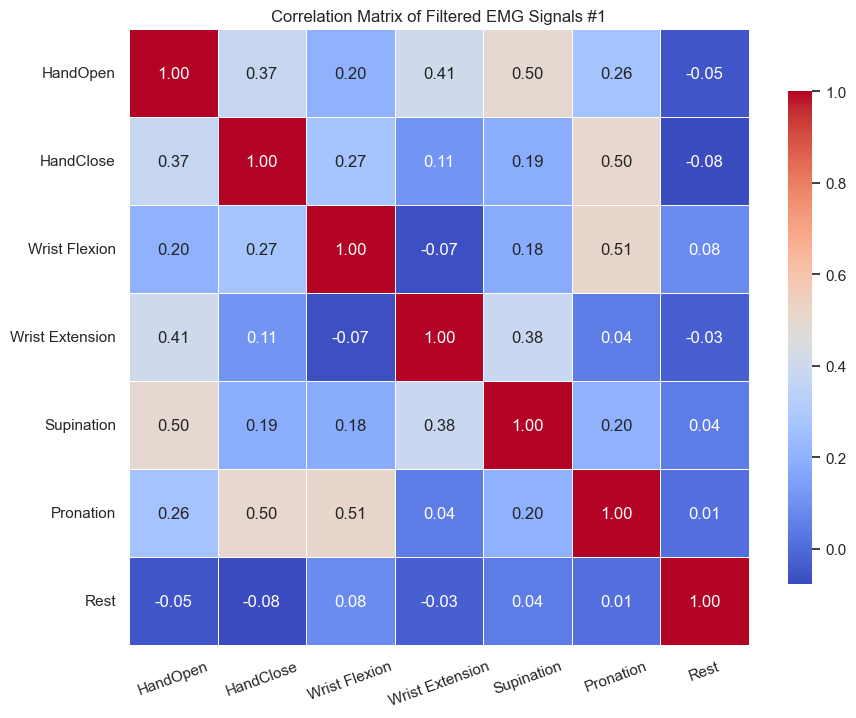


📊 Matriz de correlación - Archivo #2


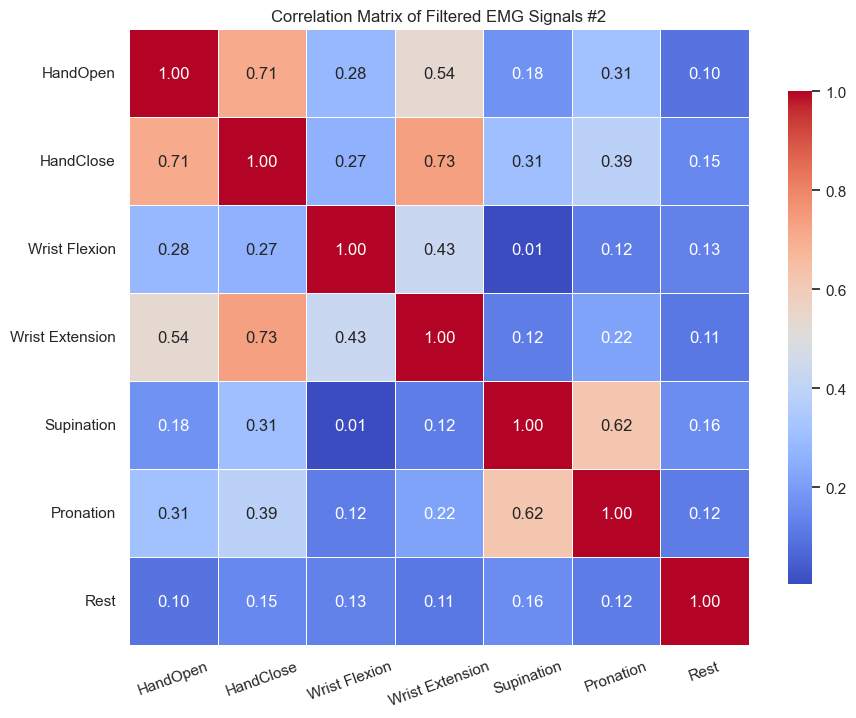


📊 Matriz de correlación - Archivo #3


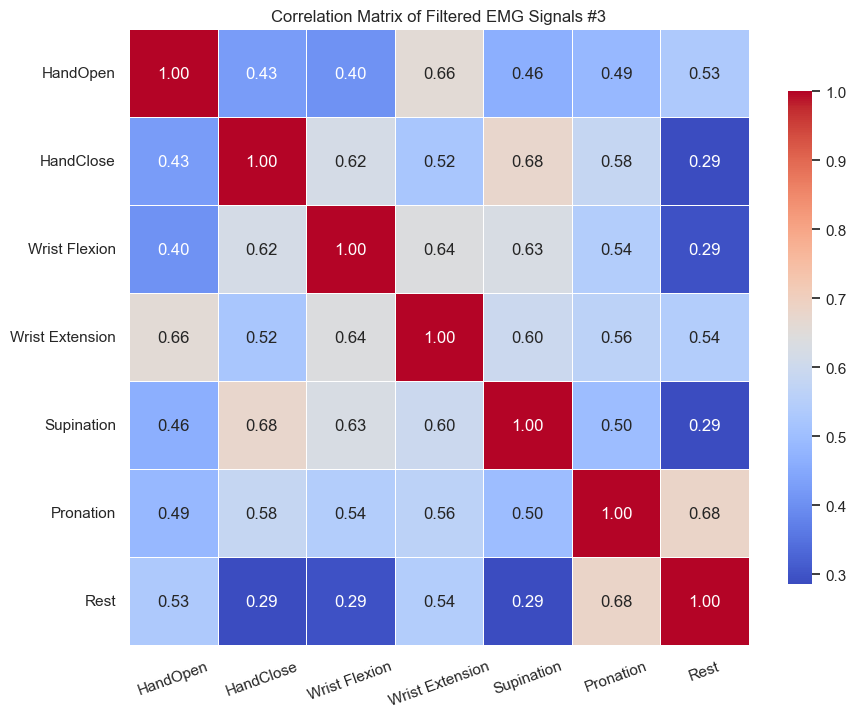


📊 Matriz de correlación - Archivo #4


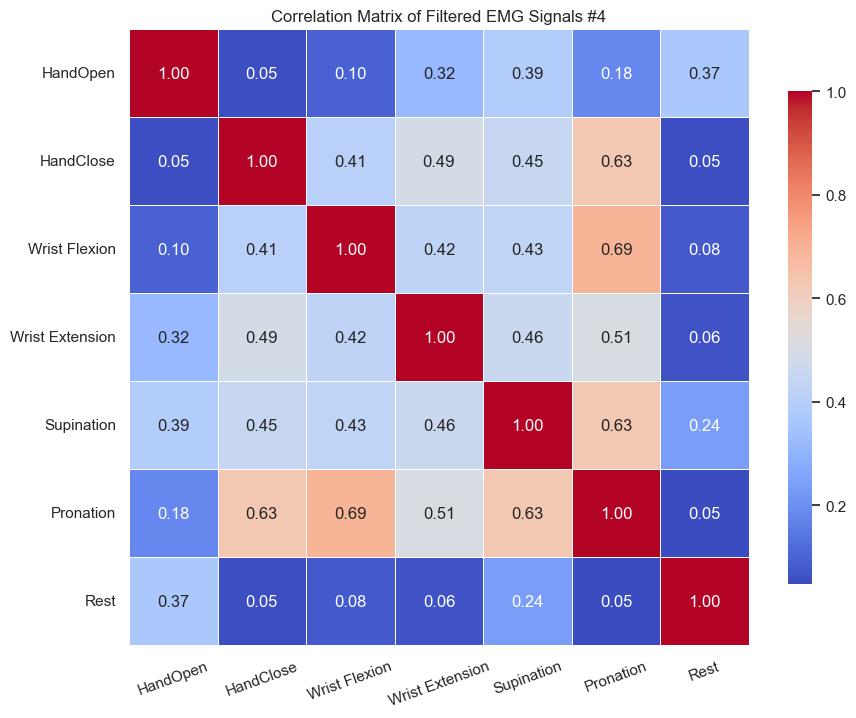


📊 Matriz de correlación - Archivo #5


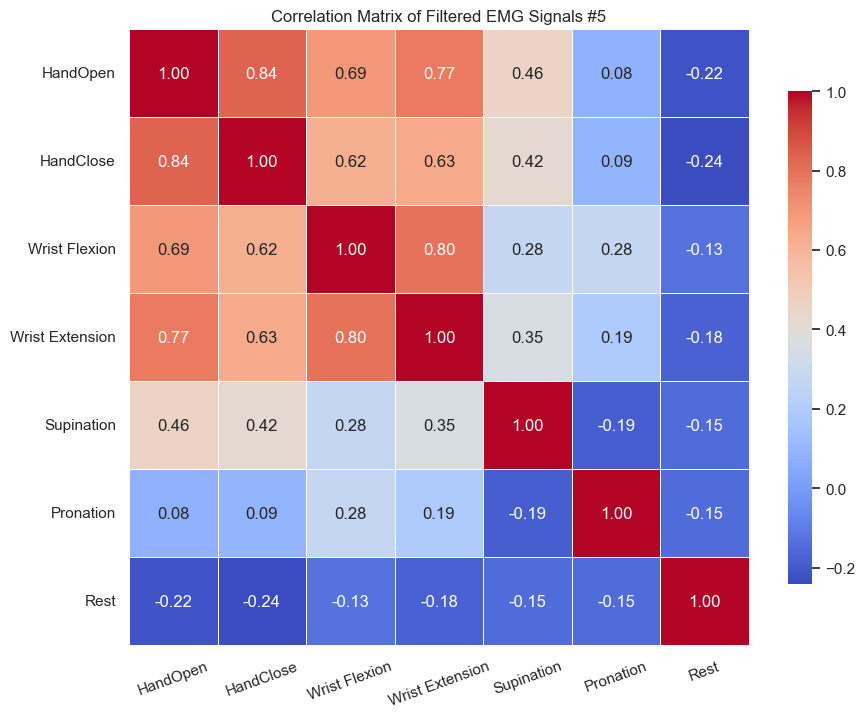


📊 Matriz de correlación - Archivo #6


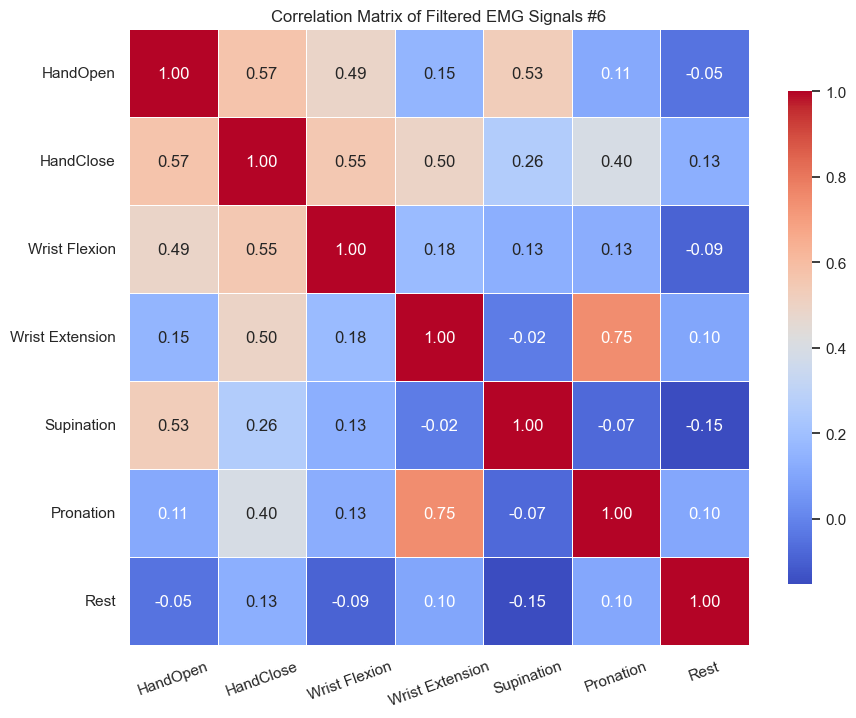


📊 Matriz de correlación - Archivo #7


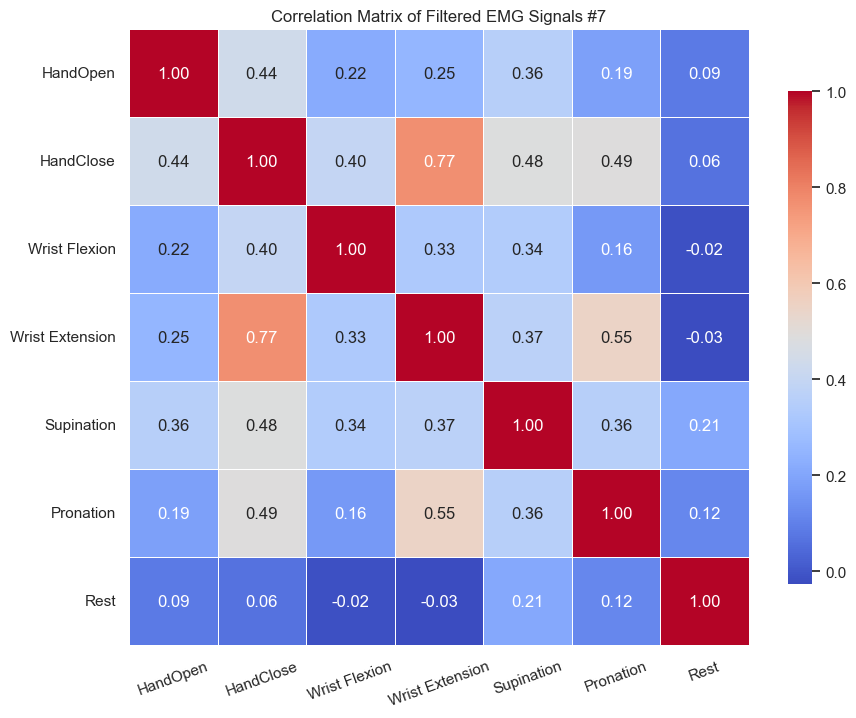


📊 Matriz de correlación - Archivo #8


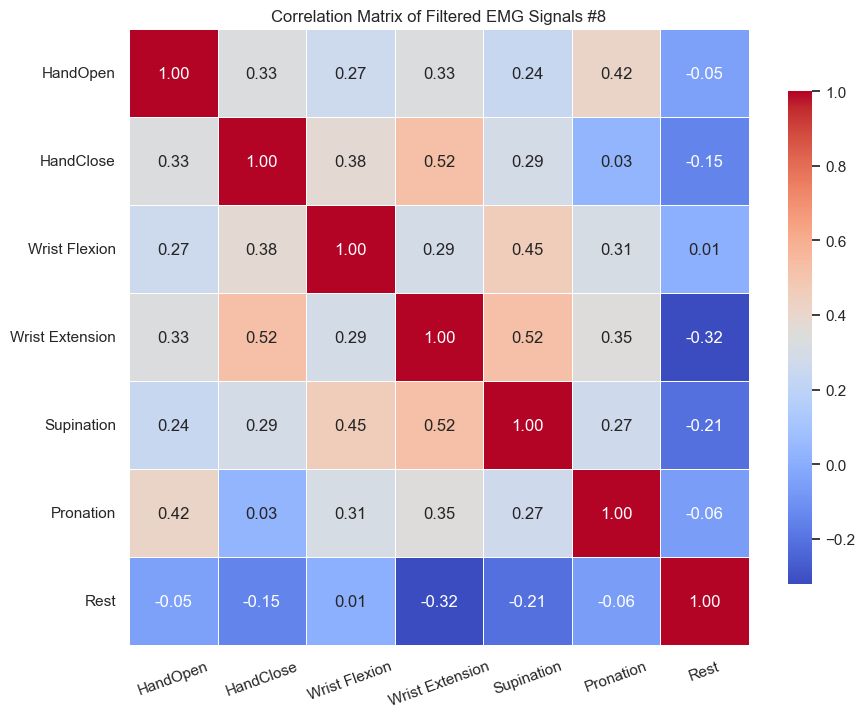


📊 Matriz de correlación - Archivo #9


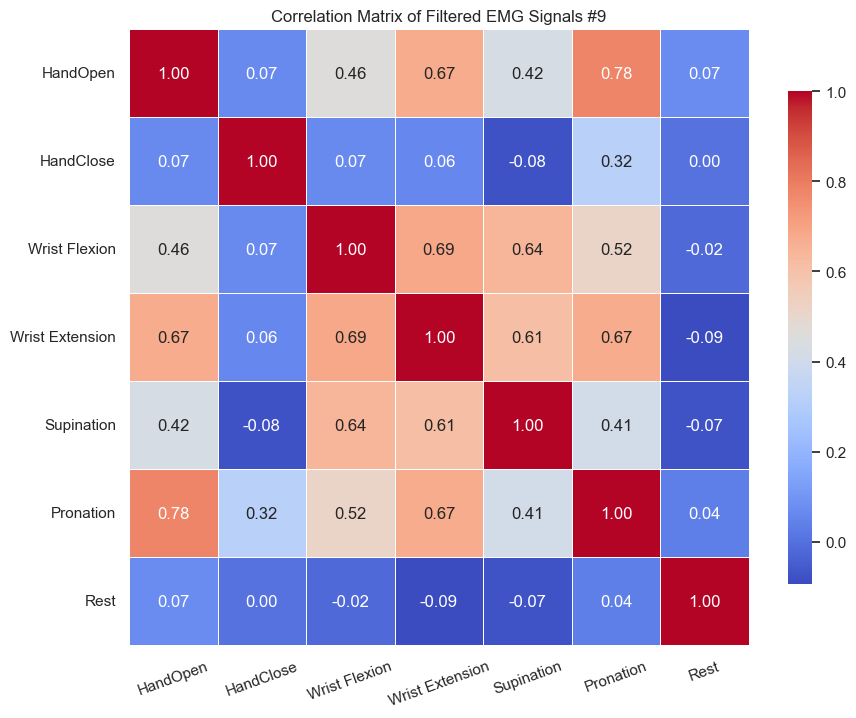


📊 Matriz de correlación - Archivo #10


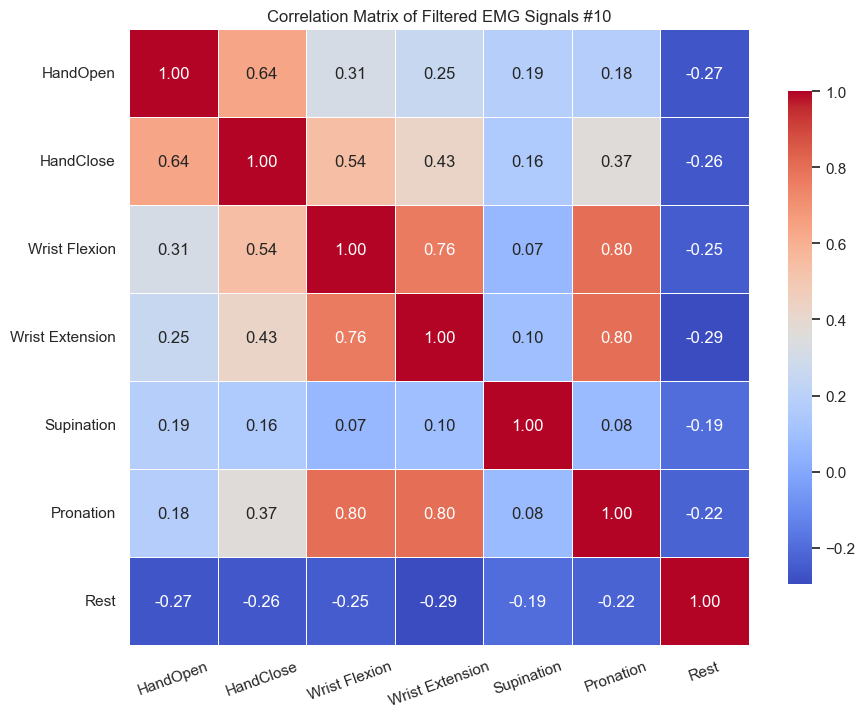


📊 Matriz de correlación - Archivo #11


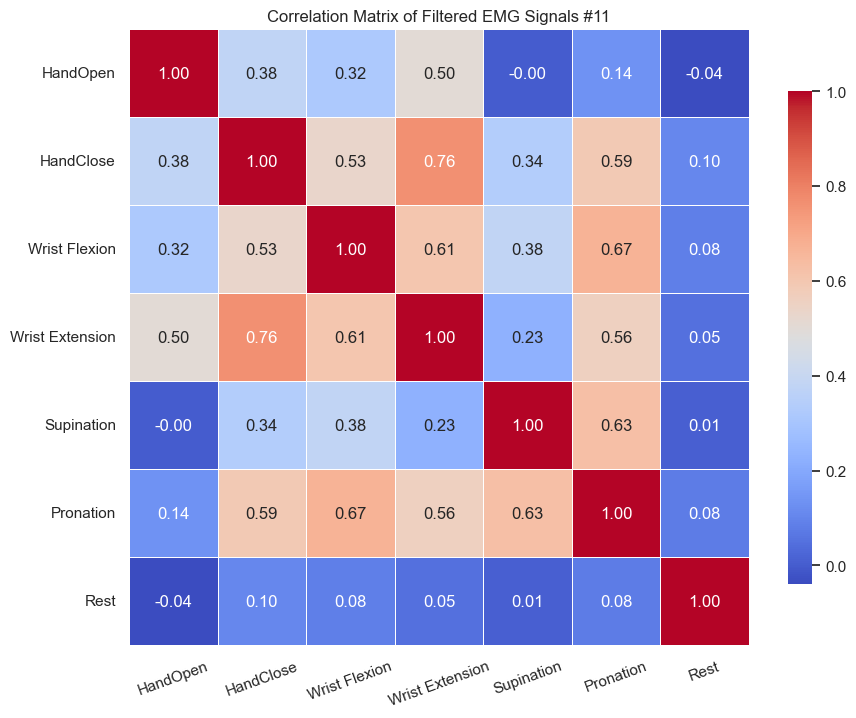

In [15]:
# 7. 📊 Visualizar la matriz de correlación
def plot_correlation_matrix(filtered_emg, columns):
    for i, data in enumerate(filtered_emg):
        plt.figure(figsize=(10, 8))
        print(f"\n📊 Matriz de correlación - Archivo #{i+1}")
        corr = data[columns].corr()
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})
        plt.xticks(rotation=20)
        plt.title(f"Correlation Matrix of Filtered EMG Signals #{i+1}", fontsize=12)
        plt.show()
    
plot_correlation_matrix(filtered_emg, columns)

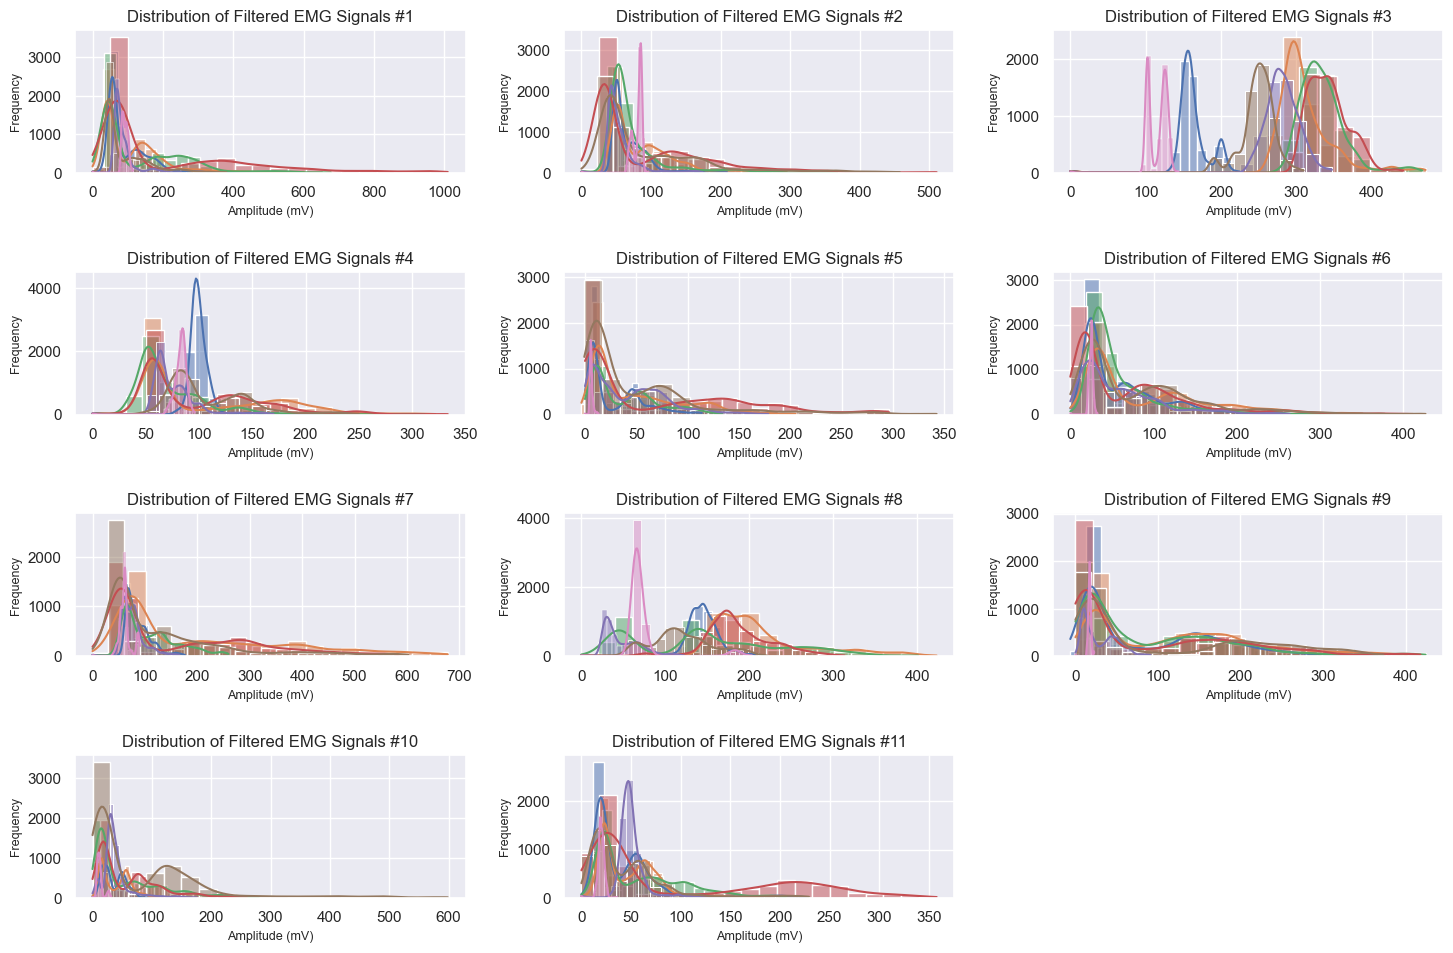

In [16]:
# 8. 📈 Visualizar la distribución de las señales por columna
def plot_signal_distribution(signal, columns):
    for i, data in enumerate(filtered_emg):
        plt.subplot(4, 3, i+1)
        for col in columns:
            sns.histplot(data[col], bins=20, kde=True)
            plt.title(f"Distribution of Filtered EMG Signals #{i+1}")
            plt.xlabel("Amplitude (mV)", fontsize=9)
            plt.ylabel("Frequency", fontsize=9)
            
plot_signal_distribution(filtered_emg, columns)
plt.tight_layout(pad=2.0)
plt.show()